## import libraries

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '한글 제목')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_te

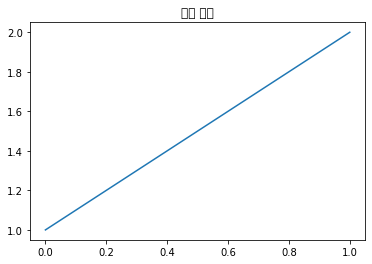

In [ ]:
plt.plot([1,2])
plt.title("한글 제목")

In [ ]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download the data


In [ ]:
!gdown --id 1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis
To: /content/1_구어체(1).xlsx
100% 15.8M/15.8M [00:00<00:00, 251MB/s]


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 465 kB 70.3 MB/s 


In [ ]:
import pandas as pd

df = pd.read_excel('/content/1_구어체(1).xlsx')
df

,SID,원문,번역문
0,1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
1,2,씨티은행에서 일하세요?,Do you work at a City bank?
2,3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
3,4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
4,5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...,...
199995,199996,나는 먼저 청소기로 바닥을 밀었어요.,"First of all, I vacuumed the floor."
199996,199997,나는 먼저 팀 과제를 하고 놀러 갔어요.,I did the team assignment first and went out t...
199997,199998,나는 비 같은 멋진 연예인을 좋아해요.,I like cool entertainer like Rain.
199998,199999,나는 멋진 자연 경치를 보고 눈물을 흘렸어.,I cried seeing the amazing scenery.


In [ ]:
df['원문'].head()

0    'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...
1                                         씨티은행에서 일하세요?
2                푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.
3     11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.
4       6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.
Name: 원문, dtype: object

In [ ]:
korean = df['원문']
english = df['번역문']
korean.isnull().sum(); english.isnull().sum()

0

In [ ]:
len(korean.unique())

200000

In [ ]:
korean[0]


"'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다."

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## 함수 정의

In [ ]:
def preprocess_sentence(sent):
  # 악센트 삭제 함수 호출
  #sent = unicode_to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣ0-9a-zA-Z!.?,]+", " ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(" +", " ", sent)
  return sent

In [ ]:
preprocess_sentence(korean[1])

'씨티은행에서 일하세요 ?'

In [ ]:
def load_preprocessed_data(korean, english):
  encoder_input, decoder_input, decoder_target = [], [], []

  for kr in korean:
    kr = preprocess_sentence(kr)
    kr_sentence = kr.split(' ')
    #clean_kr = okt.morphs(kr_sentence, stem = True)
    encoder_input.append(kr_sentence)

  for eng in english:
    eng = preprocess_sentence(eng)
    eng_in = [w for w in ("<sos> " + eng).split()]
    eng_out = [w for w in (eng + " <eos>").split()]
    decoder_input.append(eng_in)
    decoder_target.append(eng_out)
   
  return encoder_input, decoder_input, decoder_target

In [ ]:
sents_kor_in, sents_en_in, sents_en_out  = load_preprocessed_data(korean, english)

In [ ]:
print('인코더의 입력 :',sents_kor_in[:5])
print('디코더의 입력 :',sents_en_in[:5])
print('디코더의 레이블 :',sents_en_out[:5])

인코더의 입력 : [['', 'Bible', 'Coloring', '은', '성경의', '아름다운', '이야기를', '체험', '할', '수', '있는', '컬러링', '앱입니다', '.'], ['씨티은행에서', '일하세요', '?'], ['푸리토의', '베스트셀러는', '해외에서', '입소문만으로', '4차', '완판을', '기록하였다', '.'], ['11장에서는', '예수님이', '이번엔', '나사로를', '무덤에서', '불러내어', '죽은', '자', '가운데서', '살리셨습니다', '.'], ['6', '.5', ',', '7', ',', '8', '사이즈가', '몇', '개나', '더', '재입고', '될지', '제게', '알려주시면', '감사하겠습니다', '.']]
디코더의 입력 : [['<sos>', 'Bible', 'Coloring', 'is', 'a', 'coloring', 'application', 'that', 'allows', 'you', 'to', 'experience', 'beautiful', 'stories', 'in', 'the', 'Bible', '.'], ['<sos>', 'Do', 'you', 'work', 'at', 'a', 'City', 'bank', '?'], ['<sos>', 'PURITO', 's', 'bestseller', ',', 'which', 'recorded', '4th', 'rough', 'cuts', 'by', 'words', 'of', 'mouth', 'from', 'abroad', '.'], ['<sos>', 'In', 'Chapter', '11', 'Jesus', 'called', 'Lazarus', 'from', 'the', 'tomb', 'and', 'raised', 'him', 'from', 'the', 'dead', '.'], ['<sos>', 'I', 'would', 'feel', 'grateful', 'to', 'know', 'how', 'many', 'stocks', 'will', 'b

In [ ]:
# 전처리 테스트
en_sent = "Have you had dinner?"
kr_sent = "저녁 먹었어요?"

print('전처리 전 영어 문장 :', en_sent)
print('전처리 후 영어 문장 :', preprocess_sentence(en_sent))
print('전처리 전 한국어 문장 :', kr_sent)
print('전처리 후 한국어 문장 :', preprocess_sentence(kr_sent))

전처리 전 영어 문장 : Have you had dinner?
전처리 후 영어 문장 : Have you had dinner ?
전처리 전 한국어 문장 : 저녁 먹었어요?
전처리 후 한국어 문장 : 저녁 먹었어요 ?


### 단어집합 생성
단어집합을 생성하겠습니다.

In [ ]:
# 한국어
tokenizer_kor = Tokenizer(filters="", lower=False)
tokenizer_kor.fit_on_texts(sents_kor_in)

# 인코더 데이터
encoder_input = tokenizer_kor.texts_to_sequences(sents_kor_in)

In [ ]:
# 영어
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
tokenizer_en.fit_on_texts(sents_en_out)

# 디코더 데이터
decoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_en.texts_to_sequences(sents_en_out)

In [ ]:
decoder_input[-5:] # sos

[[2, 449, 12, 68, 7, 5, 44620, 4, 525, 1],
 [2, 5, 154, 4, 333, 2320, 112, 11, 156, 80, 6, 315, 1],
 [2, 5, 39, 1023, 9292, 39, 7667, 1],
 [2, 5, 2875, 972, 4, 1586, 1982, 1],
 [2, 5, 218, 648, 6, 8, 229, 727, 121, 334, 1]]

In [ ]:
decoder_target[-5:] # eos

[[449, 12, 68, 7, 5, 44620, 4, 525, 1, 3],
 [5, 154, 4, 333, 2320, 112, 11, 156, 80, 6, 315, 1, 3],
 [5, 39, 1023, 9292, 39, 7667, 1, 3],
 [5, 2875, 972, 4, 1586, 1982, 1, 3],
 [5, 218, 648, 6, 8, 229, 727, 121, 334, 1, 3]]

각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다. 

In [ ]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [ ]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (200000, 39)
디코더의 입력의 크기(shape) : (200000, 58)
디코더의 레이블의 크기(shape) : (200000, 58)


샘플은 총 200,000개 존재하며 영어 문장의 길이는 49, 한국어 문장의 길이는 31입니다. 단어 집합의 크기를 정의합니다.


In [ ]:
print(tokenizer_en.word_index)
print(tokenizer_kor.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
kor_vocab_size = len(tokenizer_kor.word_index) + 1
eng_vocab_size = len(tokenizer_en.word_index) + 1

print(f"한국어 단어 집합의 크기 : {kor_vocab_size}, 영어 단어 집합의 크기 : {eng_vocab_size}")

한국어 단어 집합의 크기 : 201724, 영어 단어 집합의 크기 : 44621


단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용합니다. 

In [ ]:
kor_to_index = tokenizer_kor.word_index  # word : idx
index_to_kor = tokenizer_kor.index_word  # idx : word
eng_to_index = tokenizer_en.word_index # word : idx
index_to_eng = tokenizer_en.index_word # idx : word

In [ ]:
index_to_kor[100], index_to_eng[100]

('너는', 'other')

In [ ]:
print(eng_to_index)
print(index_to_eng)

{'.': 1, '<sos>': 2, '<eos>': 3, 'the': 4, 'I': 5, 'to': 6, ',': 7, 'a': 8, 'you': 9, 'is': 10, 'and': 11, 'of': 12, 'in': 13, '?': 14, 'it': 15, 'for': 16, 'that': 17, 'have': 18, 'my': 19, 'with': 20, 's': 21, 't': 22, 'are': 23, 'be': 24, 'on': 25, 'will': 26, 'this': 27, 'can': 28, 'me': 29, 'The': 30, 'was': 31, 'your': 32, 'It': 33, 'We': 34, 'we': 35, 'not': 36, 'as': 37, 'at': 38, 'like': 39, 'from': 40, 'so': 41, 'm': 42, 'want': 43, 'time': 44, 'do': 45, 'about': 46, 'by': 47, 'if': 48, 'an': 49, 'but': 50, 'because': 51, 'when': 52, 'there': 53, 'go': 54, 'am': 55, 'You': 56, 'has': 57, 'know': 58, 'think': 59, 'This': 60, 'get': 61, 'If': 62, 'don': 63, 'Please': 64, 'would': 65, 'good': 66, 'after': 67, 'all': 68, 'our': 69, 'people': 70, 'who': 71, 'He': 72, 'one': 73, 'more': 74, 'up': 75, 'work': 76, 'or': 77, 'going': 78, 'today': 79, 'out': 80, 'make': 81, 'There': 82, 'should': 83, 'What': 84, 'been': 85, 'My': 86, 'Korea': 87, 'day': 88, 'need': 89, 'had': 90, 'take

테스트 데이터를 분리하겠습니다. 인코더 input, 디코더 input, 디코더 output이 동일하게 분리되어야 하기 때문에 랜덤한 정수배열을 만들어 직접 나누겠습니다. 

우선 랜덤하게 시퀀스를 섞습니다. 

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [ 61458  66615  32427 ... 179727  82348 150023]


In [ ]:
# 배열
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
decoder_input[indices[0]], decoder_target[indices[0]]

(array([   2, 1034,    7,    5,   18,  251,    4, 6474,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32),
 array([1034,    7,    5,   18,  251,    4, 6474,    1,    3,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0], dtype=int32))

`<sos>` `<eos>` 토큰을 제외한 다른 단어들은 동일한 인덱스를 갖고 있어야 합니다. 

10%의 데이터를 test데이터로 분리하겠습니다. 

In [ ]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
hidden_units = 256  # Latent dimensionality of the encoding space.
embedding_dim = 64
num_samples = 200000  # Number of samples to train on.

In [ ]:
n_of_val = int(num_samples*0.1)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [ ]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (180000, 39)
훈련 target 데이터의 크기 : (180000, 58)
훈련 target 레이블의 크기 : (180000, 58)
테스트 source 데이터의 크기 : (20000, 39)
테스트 target 데이터의 크기 : (20000, 58)
테스트 target 레이블의 크기 : (20000, 58)


## Modeling


In [ ]:
# 직접 만들어보세요!

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Masking, GRU
from tensorflow.keras.models import Model

### Encoder

In [ ]:
# 인코더
encoder_inputs = Input(shape=(None, ))

# 임베딩 층
enc_emb = Embedding(kor_vocab_size, embedding_dim)(encoder_inputs)

# 상태값 리턴을 위해 return_state는 True
encoder_gru1 = GRU(hidden_units, return_sequences=True, return_state = True)
encoder_gru2 = GRU(hidden_units, return_sequences=True, return_state = True)
encoder_gru3 = GRU(hidden_units, return_sequences=True, return_state = True)
encoder_gru4 = GRU(hidden_units, return_sequences=True, return_state = True)
encoder_gru5 = GRU(hidden_units, return_sequences=True, return_state = True)

# 은닉 상태와 셀 상태를 리턴
encoder_outputs_1, state_h1 = encoder_gru1(enc_emb)
encoder_states_1 = state_h1
encoder_outputs_2, state_h2 = encoder_gru2(encoder_outputs_1)
encoder_states_2 = state_h2
encoder_outputs_3, state_h3 = encoder_gru3(encoder_outputs_2)
encoder_states_3 = state_h3
encoder_outputs_4, state_h4 = encoder_gru4(encoder_outputs_3)
encoder_states_4 = state_h4
encoder_outputs, state_h5 = encoder_gru5(encoder_outputs_4)
encoder_states_5 = state_h5

#encoder_states = state_h5 # 인코더의 은닉 상태와 셀 상태를 저장
## return_state = True이므로 state_h, state_c를 받아옴.

In [ ]:
from tensorflow.keras.layers import Attention

### Decoder


In [ ]:
# 디코더
decoder_inputs = Input(shape=(None, ))

# 임베딩 층
dec_emb_layer = Embedding(eng_vocab_size, hidden_units)

# 임베딩 결과
dec_emb = dec_emb_layer(decoder_inputs)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_gru1 = GRU(hidden_units, return_sequences=True, return_state = True)
decoder_gru2 = GRU(hidden_units, return_sequences=True, return_state = True)
decoder_gru3 = GRU(hidden_units, return_sequences=True, return_state = True)
decoder_gru4 = GRU(hidden_units, return_sequences=True, return_state = True)
decoder_gru = GRU(hidden_units, return_sequences=True, return_state = True)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs_1, _, = decoder_gru1(dec_emb, initial_state = state_h1)
decoder_outputs_2, _, = decoder_gru2(decoder_outputs_1, initial_state = state_h2)
decoder_outputs_3, _, = decoder_gru3(decoder_outputs_2, initial_state = state_h3)
decoder_outputs_4, _, = decoder_gru4(decoder_outputs_3, initial_state = state_h4)
decoder_outputs_5, _, = decoder_gru(decoder_outputs_4, initial_state = state_h5)


# attention
S_ = tf.concat([state_h5[:, tf.newaxis, :], decoder_outputs_5[:, :-1, :]], axis=1) # query 

attention = Attention(hidden_units)
context_vector, _ = attention([ S_, encoder_outputs], return_attention_scores = True)

concat = tf.concat([decoder_outputs_5, context_vector], axis=-1)


# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(eng_vocab_size, activation = 'softmax')
decoder_outputs = decoder_dense(concat)

In [ ]:
# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

### Summary

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     12910336    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 256)    11422976    ['input_2[0][0]']                
                                                                                              

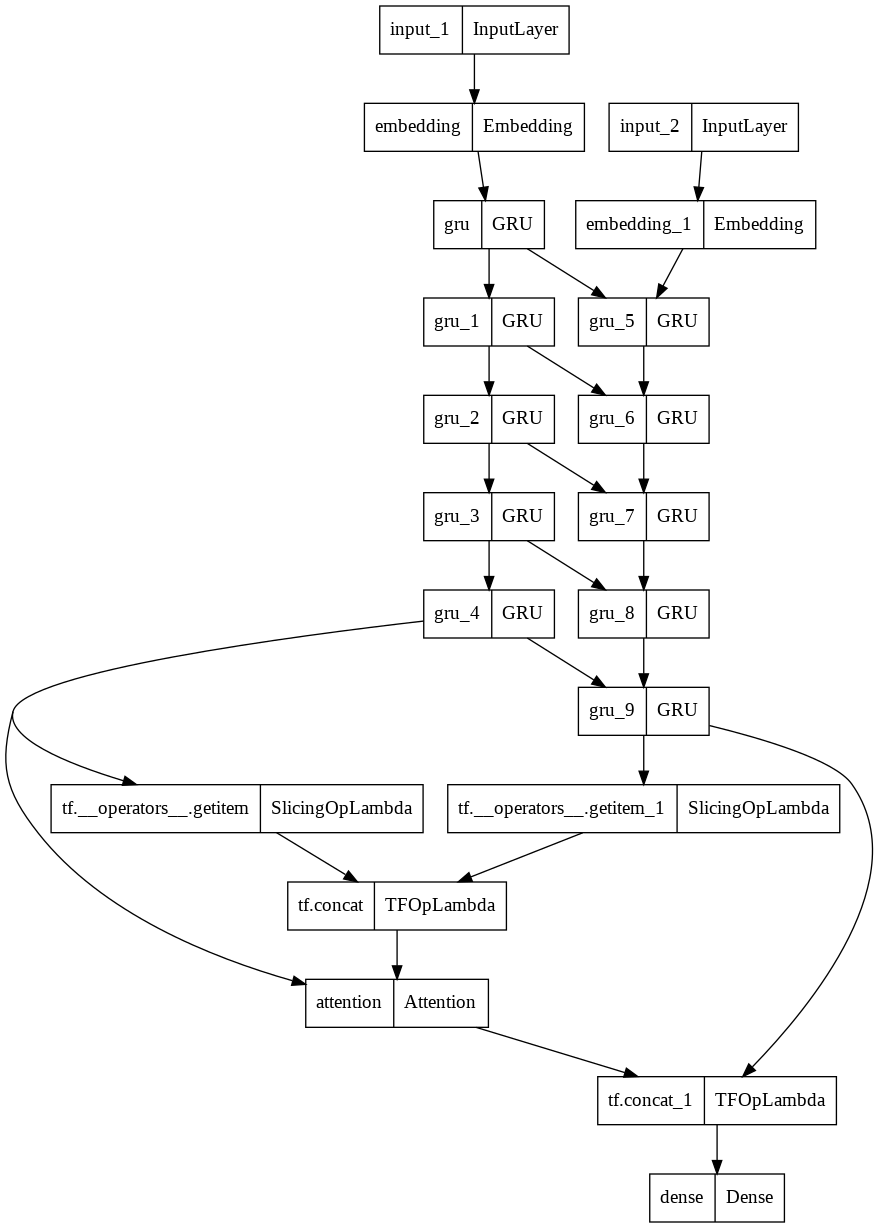

In [ ]:
tf.keras.utils.plot_model(model, to_file='gru5_attention.png', )

### Model Activating

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early = EarlyStopping(monitor='val_loss', patience=3)
check = ModelCheckpoint(filepath='gru5_best_model.h5', monitor='val_acc', mode='max', 
                        verbose=1, save_best_only=True)
# verbose : 0 안보여줌, 1 : 한줄, 2 : 마지막값
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=150, callbacks=[early, check])

Epoch 1/150
1407/1407 [==============================] - ETA: 0s - loss: 1.5119 - acc: 0.7845
Epoch 1: val_acc improved from -inf to 0.78971, saving model to gru5_best_model.h5
1407/1407 [==============================] - 819s 558ms/step - loss: 1.5119 - acc: 0.7845 - val_loss: 1.3788 - val_acc: 0.7897
Epoch 2/150
1407/1407 [==============================] - ETA: 0s - loss: 1.0985 - acc: 0.8330
Epoch 2: val_acc improved from 0.78971 to 0.84303, saving model to gru5_best_model.h5
1407/1407 [==============================] - 782s 555ms/step - loss: 1.0985 - acc: 0.8330 - val_loss: 0.9949 - val_acc: 0.8430
Epoch 3/150
1407/1407 [==============================] - ETA: 0s - loss: 0.9147 - acc: 0.8495
Epoch 3: val_acc improved from 0.84303 to 0.85229, saving model to gru5_best_model.h5
1407/1407 [==============================] - 782s 556ms/step - loss: 0.9147 - acc: 0.8495 - val_loss: 0.9049 - val_acc: 0.8523
Epoch 4/150
1407/1407 [==============================] - ETA: 0s - loss: 0.8092 - 

## 최종 번역기 만들기

- 학습된 모델을 바탕으로 번역기를 만들어봅시다. -> 즉 inference용 번역기 

- *교사 강요(teacher forcing)*를 사용하기 못하는 것을 제외하고는 훈련 루프와 비슷합니다. 각 마지막 시점(time step)에서 이전 디코더 인코더의 결과와 은닉 상태(hidden state)를 가진 예측 값을 디코더에 입력합니다.

    1. 번역하고자 하는 입력 문장이 인코더로 입력되어 인코더의 마지막 시점의 은닉 상태와 셀 상태를 얻습니다.
    2. 인코더의 은닉 상태와 셀 상태, 그리고 토큰 <sos>를 디코더로 보냅니다.
    3. 디코더가 토큰 <eos>가 나올 때까지 다음 단어를 예측하는 행동을 반복합니다.

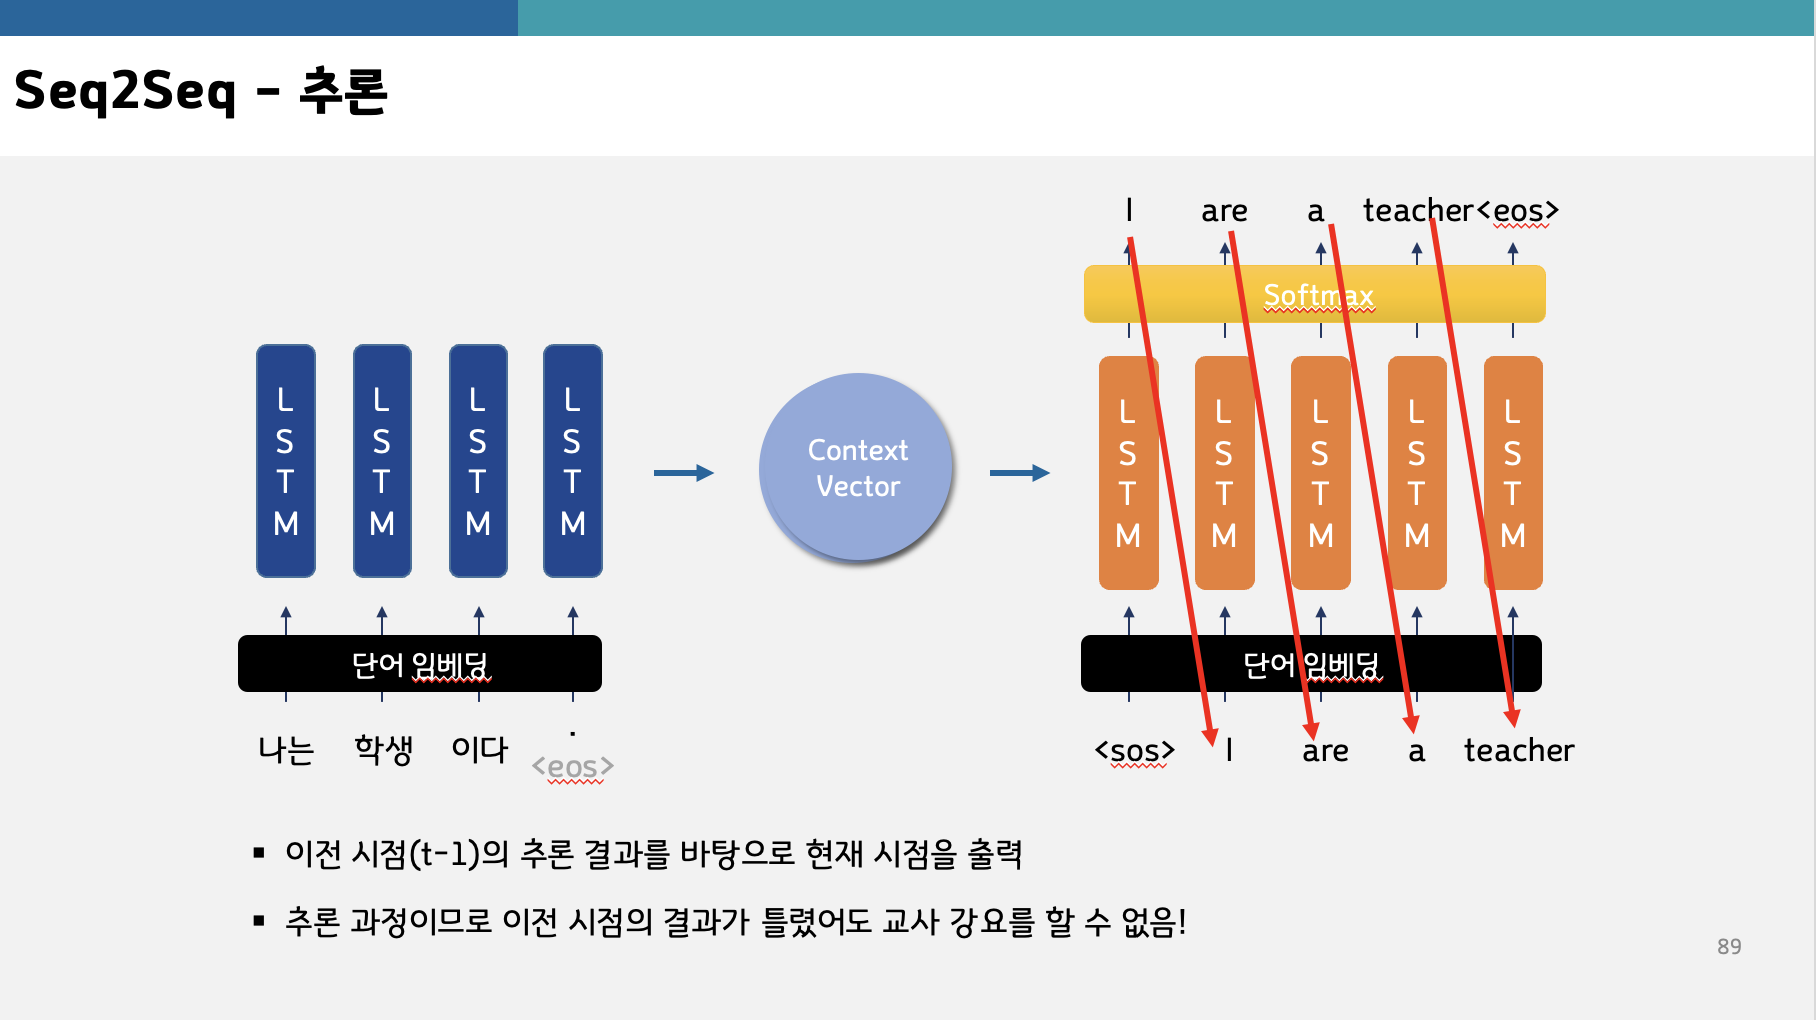

인코더와 디코더를 따로 만들어야 함.



### Encoder & Decoder

#### Encoder

In [2]:
# 인코더 - 훈련과 동일 (concatnated 이전까지지)
encoder_model = Model(encoder_inputs, [encoder_states_1, encoder_states_2
                    , encoder_states_3, encoder_states_4, encoder_states_5])

NameError: ignored

#### Decoder

In [ ]:
from tensorflow.python.ops.gen_array_ops import concat_v2_eager_fallback
# 디코더 

# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h1 = Input(shape=(hidden_units,))
decoder_states_inputs1 = [decoder_state_input_h1]
decoder_state_input_h2 = Input(shape=(hidden_units,))
decoder_states_inputs2 = [decoder_state_input_h2]
decoder_state_input_h3 = Input(shape=(hidden_units,))
decoder_states_inputs3 = [decoder_state_input_h3]
decoder_state_input_h4 = Input(shape=(hidden_units,))
decoder_states_inputs4 = [decoder_state_input_h4]
decoder_state_input_h5 = Input(shape=(hidden_units,))
decoder_states_inputs5 = [decoder_state_input_h5]

query_vec = Input(shape=(hidden_units,))                # query_input
encoder_outputs2 = Input(shape =(None, hidden_units,))  # value_input

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs6, state_h6 = decoder_gru1(dec_emb2, initial_state=decoder_states_inputs1)
decoder_states6 = [state_h6]
decoder_outputs7, state_h7 = decoder_gru2(decoder_outputs6, initial_state=decoder_states_inputs2)
decoder_states7 = [state_h7]
decoder_outputs8, state_h8 = decoder_gru3(decoder_outputs7, initial_state=decoder_states_inputs3)
decoder_states8 = [state_h8]
decoder_outputs9, state_h9 = decoder_gru4(decoder_outputs8, initial_state=decoder_states_inputs4)
decoder_states9 = [state_h9]
decoder_outputs10, state_h10 = decoder_gru(decoder_outputs9, initial_state=decoder_states_inputs5)
decoder_states10 = [state_h10]


# attention
S_ = tf.concat([query_vec[:, tf.newaxis, :], decoder_outputs10[:, :-1, :]], axis=1) # query 

context_vector, att_score = attention([S_, encoder_outputs2], return_attention_scores = True)
concat2 = tf.concat([decoder_outputs10, context_vector], axis=-1)


# 모든 시점에 대해서 단어 예측 (Fully Connected)
decoder_outputs10 = decoder_dense(concat2)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs, query_vec, encoder_outputs2] + [decoder_states_inputs1, 
                decoder_states_inputs2, decoder_states_inputs3, 
                decoder_states_inputs4, decoder_states_inputs5],
    [decoder_outputs10, att_score] + [decoder_states6, decoder_states7, 
                decoder_states8, decoder_states9, decoder_states10])

테스트 단계에서의 동작을 위한 decode_sequence 함수를 구현합니다. 
1. 입력 문장이 들어오면 인코더는 마지막 시점까지 전개하여 마지막 시점의 은닉 상태와 셀 상태를 리턴합니다. -> `states_value` 
2. 디코더의 초기 입력으로 <SOS>를 준비합니다. -> `target_seq`
3. 이 두 가지 입력을 가지고 while문 안으로 진입하여 이 두 가지를 디코더의 입력으로 사용합니다. 
4. 이제 디코더는 현재 시점에 대해서 예측합니다. 
    - 예측 벡터로부터 현재 시점의 예측 단어인 target_seq를 얻고, h와 c 이 두 개의 값은 states_value에 저장합니다. 
    - while문의 다음 루프. 즉, 두번째 시점의 디코더의 입력으로 다시 target_seq와 states_value를 사용합니다. 
    - 이를 현재 시점의 예측 단어로 <eos>를 예측하거나 번역 문장의 길이가 50이 넘는 순간까지 반복합니다. 
5. 각 시점마다 번역된 단어는 decoded_sentence에 누적하여 저장하였다가 최종 번역 시퀀스로 리턴합니다.

In [ ]:
encoder_model.predict

### 번역기 내부 함수 정의

In [ ]:
max_kor_len, max_eng_len  = 30, 50

attention_plot = np.zeros((max_eng_len, max_kor_len))

sentence_kor1 = preprocess_sentence(korean[1])    # 전처리함수
tokens_kor1 = sentence_kor1.split(" ")

inputs_kor1 = tokenizer_kor.texts_to_sequences([tokens_kor1])

inputs_kor1 = tf.keras.preprocessing.sequence.pad_sequences(inputs_kor1,
                                                        maxlen=max_kor_len,
                                                        padding='post')
encoder_test, states_value = encoder_model.predict(inputs_kor1)

1/1 [==============================] - 0s 46ms/step


ValueError: ignored

In [1]:
len(encoder_model.predict(inputs_kor1))

NameError: ignored

#### decode_sequence 함수 정의

In [ ]:
def decode_sequence(sentence):
    # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
    max_kor_len, max_eng_len  = 30, 50

    attention_plot = np.zeros((max_eng_len, max_kor_len))

    sentence = preprocess_sentence(sentence)    # 전처리함수
    tokens = sentence.split(" ")

    inputs = tokenizer_kor.texts_to_sequences([tokens])

    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                            maxlen=max_kor_len,
                                                            padding='post')
    encoder_test, states_value = encoder_model.predict(inputs)    

    # <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = eng_to_index['<sos>']

    stop_condition = False
    decoded_sentence = ''

    # stop_condition이 True가 될 때까지 루프 반복
    # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    for t in range(max_eng_len):
        # 이전 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, att_score, h1, h2, h3, h4, h5 = decoder_model.predict([target_seq, states_value[4][0], encoder_test] + states_value, verbose = 0)
       
        # 어텐션 가중치 시각화를 위해 저장 
        att_score = tf.reshape(att_score, (-1, ))
        attention_plot[t] = att_score.numpy() 

        # 예측 결과를 단어로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_eng[sampled_token_index]

        # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence += ' '+sampled_char


        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h1, h2, h3, h4, h5]

        # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
        if sampled_char == '<eos>':
            break 

    return sentence, decoded_sentence, attention_plot

결과 확인을 위한 함수를 만듭니다.

#### 결과 확인 함수 정의

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_kor[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != eng_to_index['<eos>']):
    # if(encoded_word != 0 and encoded_word != eng_to_index['<sos>'] and encoded_word != eng_to_index['<eos>']):
      sentence = sentence + index_to_eng[encoded_word] + ' '
  return sentence

#### plot_attention 함수 정의 

In [ ]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    # you need to change the fname based on your system, and the Chinese can be displayed in the plot
    # font = FontProperties(fname=r"./data/TaipeiSansTCBeta-Regular.ttf", size=14)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    # set the x-tick/y-tick labels with list of string labels
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation = 90)
    ax.set_yticklabels(predicted_sentence, fontdict=fontdict)

    # set tick locators
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [ ]:
def translate_train(seq_index):
  input_seq = encoder_input_train[seq_index: seq_index + 1]

  sentence = seq_to_src(encoder_input_train[seq_index]).strip()
  _, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print("Right translation :",seq_to_tar(decoder_input_train[seq_index]))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
indices = np.random.randint(10000, size = (5,))
print(indices)
for seq_index in indices:
    translate_train(seq_index)
    print("-"*50)

[4855 2280  548 9531  955]
1/1 [==============================] - 0s 47ms/step


ValueError: ignored

#### translate_test 함수 정의

In [ ]:
def translate_test(seq_index):
  input_seq = encoder_input_test[seq_index: seq_index + 1]

  sentence = seq_to_src(encoder_input_test[seq_index]).strip()
  _, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print("Right translation :",seq_to_tar(decoder_input_train[seq_index]))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
indices = np.random.randint(1000, size = (5,))

for seq_index in indices:
  translate_test(seq_index)
  print("-"*50)

1/1 [==============================] - 0s 18ms/step
Input: j ai effectue mon boulot .
Right translation : <sos> get on the bus . 
Predicted translation:  i did my job . <eos>
--------------------------------------------------
1/1 [==============================] - 0s 16ms/step
Input: tom etait bleme .
Right translation : <sos> he made me sing . 
Predicted translation:  tom was there . <eos>
--------------------------------------------------
1/1 [==============================] - 0s 15ms/step
Input: cassez vous .
Right translation : <sos> did tom eat dinner ? 
Predicted translation:  back off ! <eos>
--------------------------------------------------
1/1 [==============================] - 0s 17ms/step
Input: tom a continue a ecrire .
Right translation : <sos> i live in the city . 
Predicted translation:  tom kept writing . <eos>
--------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Input: je le pense aussi .
Right translation : <sos> i m 

In [ ]:
def translate(sentence):
  sentence, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
encoder_model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_8 (Embedding)     (None, None, 64)          12910336  
                                                                 
 gru_40 (GRU)                [(None, None, 256),       247296    
                              (None, 256)]                       
                                                                 
 gru_41 (GRU)                [(None, None, 256),       394752    
                              (None, 256)]                       
                                                                 
 gru_42 (GRU)                [(None, None, 256),       394752    
                              (None, 256)]                       
                                                          

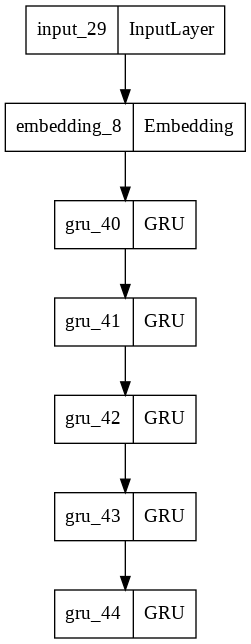

In [ ]:
tf.keras.utils.plot_model(encoder_model)

In [ ]:
decoder_model.summary()

Model: "model_37"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, None, 256)    11422976    ['input_30[0][0]']               
                                                                                                  
 input_93 (InputLayer)          [(None, 256)]        0           []                               
                                                                                                  
 gru_45 (GRU)                   [(None, None, 256),  394752      ['embedding_9[13][0]',           
                                 (None, 256)]                     'input_93[0][0]']        

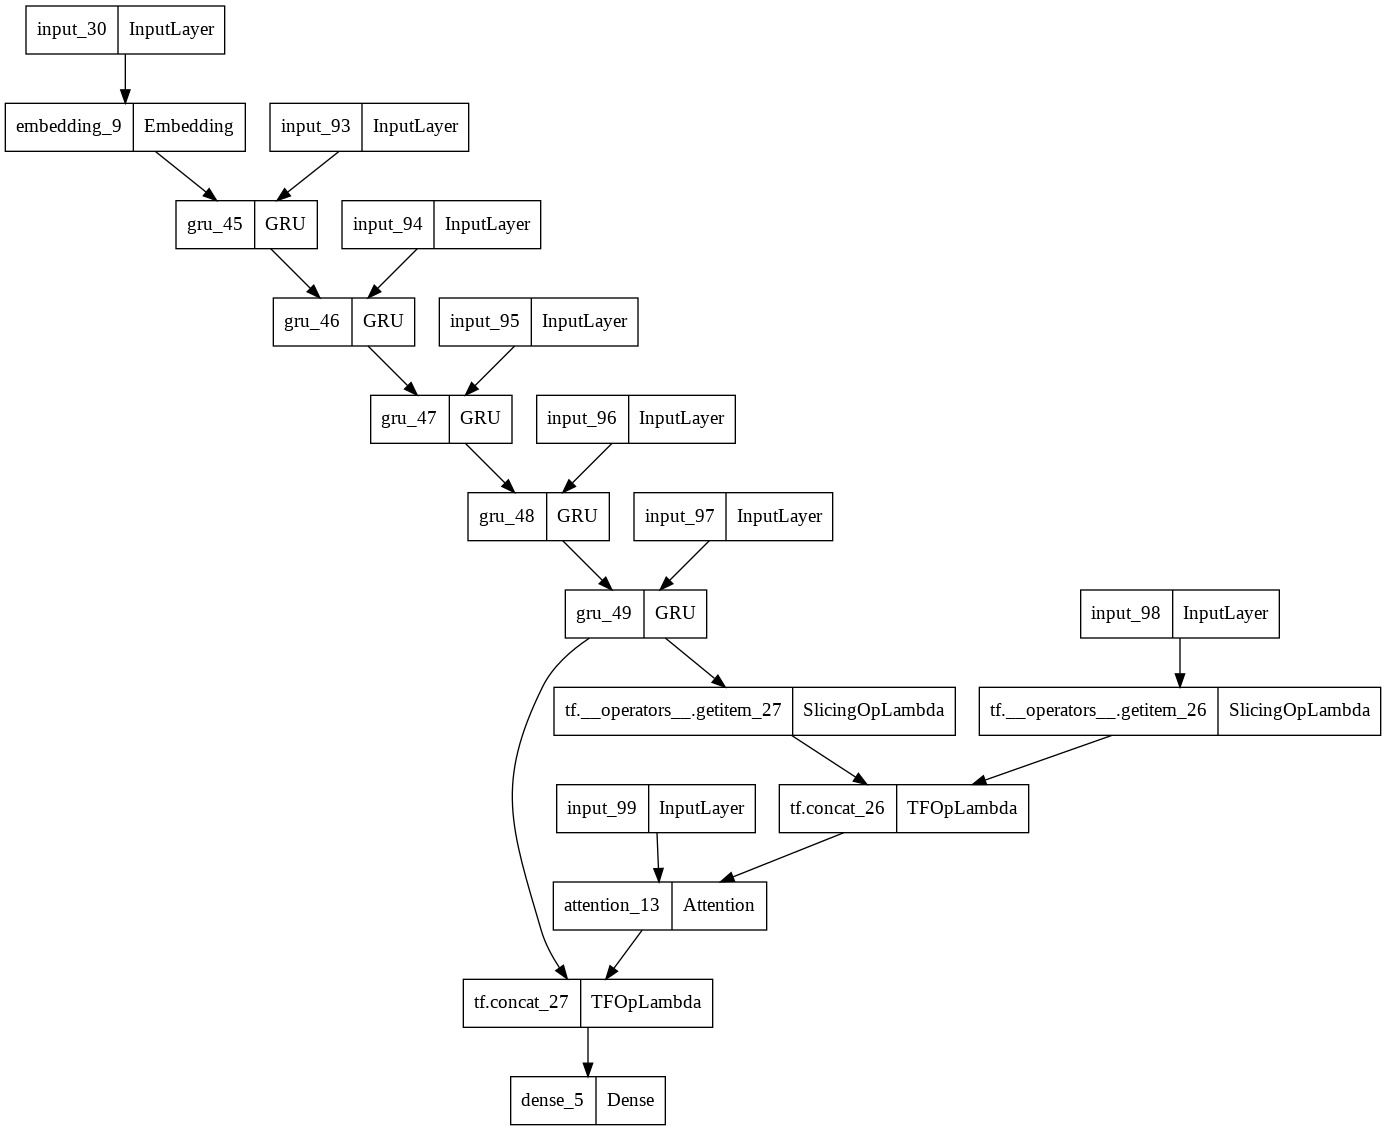

In [ ]:
tf.keras.utils.plot_model(decoder_model)

결과 확인을 위한 함수를 만듭니다.

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_kor[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != eng_to_index['<sos>'] and encoded_word != eng_to_index['<eos>']):
      sentence = sentence + index_to_eng[encoded_word] + ' '
  return sentence

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_train[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_train[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_train[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

1/1 [==============================] - 1s 1s/step


ValueError: ignored

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_test[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

1/1 [==============================] - 0s 30ms/step


ValueError: ignored

### TEST 결과 BLEU Score ~ 0.0318

## BLEU Score (Bilingual Evaluation Understudy Score)
기계 번역의 성능이 얼마나 뛰어난가를 측정하기 위해 사용되는 대표적인 방법 중 하나인 BLEU(Bilingual Evaluation Understudy)를 측정해봅시다. 
- 논문 : BLEU: a Method for Automatic Evaluation of Machine Translation
- BLEU 점수는 기계 번역된 텍스트와 고품질 참조 번역 세트의 유사성을 측정하는 0과 1 사이의 숫자입니다. 
    - 값이 0이면 기계 번역된 출력이 참조 번역과 겹치는 부분이 없는 것을 의미하고(저품질)
    - 1이면 참조 번역과 완벽하게 겹치는 것을 의미합니다(고품질)

- BLEU 설명 
    - https://jrc-park.tistory.com/273
    - https://wikidocs.net/31695
    - https://cloud.google.com/translate/automl/docs/evaluate?hl=ko#bleu

In [ ]:
import numpy as np
from collections import Counter
from nltk import ngrams

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다. 

In [ ]:
import nltk.translate.bleu_score as bleu

candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))

패키지 NLTK의 BLEU : 0.5045666840058485


In [ ]:
ref_train = [seq_to_tar(sen) for sen in decoder_input_train[:100]]

In [ ]:
from tqdm.notebook import tqdm 

pred_train = []
for idx in tqdm(range(len(encoder_input_train[:100]))):
    pred_train.append(decode_sequence(encoder_input_train[idx:idx+1]))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
bleu_score = 0
for ref, pred in zip(ref_train, pred_train):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_train)
bleu_score

In [ ]:
ref_test = [seq_to_tar(sen) for sen in decoder_input_test[:100]]
pred_test = [decode_sequence(encoder_input_test[idx:idx+1]) for idx in tqdm(range(len(encoder_input_test[:100])))]

bleu_score = 0
for ref, pred in zip(ref_test, pred_test):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_test)
bleu_score

### Reference

- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://wikidocs.net/86900